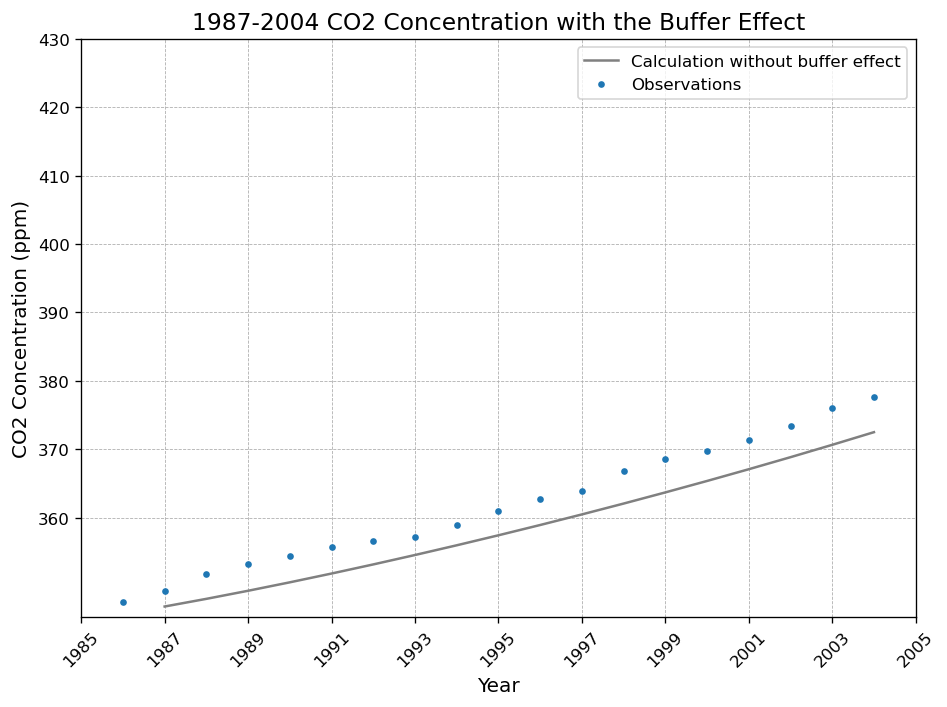

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#1.1
# 定义排放速率函数
def r_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 定义微分方程函数
def pend(y, x1, k12, k21):
    N1, N2, r = y
    dydt = [
        -k12 * N1 + k21 * N2 + r,
        k12 * N1 - k21 * N2,
        2.43954472e-02 * (r + 1.12313831e+02)
    ]
    return dydt

# 时间范围：从1987年到2004年
x1 = np.arange(1987, 2005)
r1 = r_func(x1, 4.82316522e-18, 2.43954472e-02, -1.12313831e+02)

# 初始条件，来自论文，1pg=10^15g=1000百万公吨
k12 = 105 / 740
k21 = 102 / 900
N1 = 740 * 1000  # 初始大气碳浓度（百万公吨）
N2 = 900 * 1000  # 初始海洋表层碳浓度（百万公吨）
y0 = [N1, N2, r1[0]]

# 使用 odeint 求解微分方程
sol_no_buffer = odeint(pend, y0, x1, args=(k12, k21)) / 1000 / 740 * 347  # 转化为 ppm

# 绘制根据公式1-2的积分曲线
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(x1, sol_no_buffer[:, 0], color='gray', label='Calculation without buffer effect')

# 根据链接 Mauna Loa CO2 annual mean data 中的数据绘制实际观测图，选取1986-2004年的数据
CO2_ppm = pd.read_csv("co2_annmean_mlo.csv")
CO2_ppm_1986_2004 = CO2_ppm.iloc[27:46, :]
plt.plot(CO2_ppm_1986_2004['year'], CO2_ppm_1986_2004['mean'], ".", label='Observations')

# 设置横纵坐标轴刻度，设置 legend 位置，设置横纵坐标轴标签，设置标题
plt.yticks(ticks=np.arange(360, 440, 10), fontsize=10)
plt.xticks(ticks=np.arange(1985, 2006, 2), fontsize=10, rotation=45)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.title('1987-2004 CO2 Concentration with the Buffer Effect', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图形
plt.show()


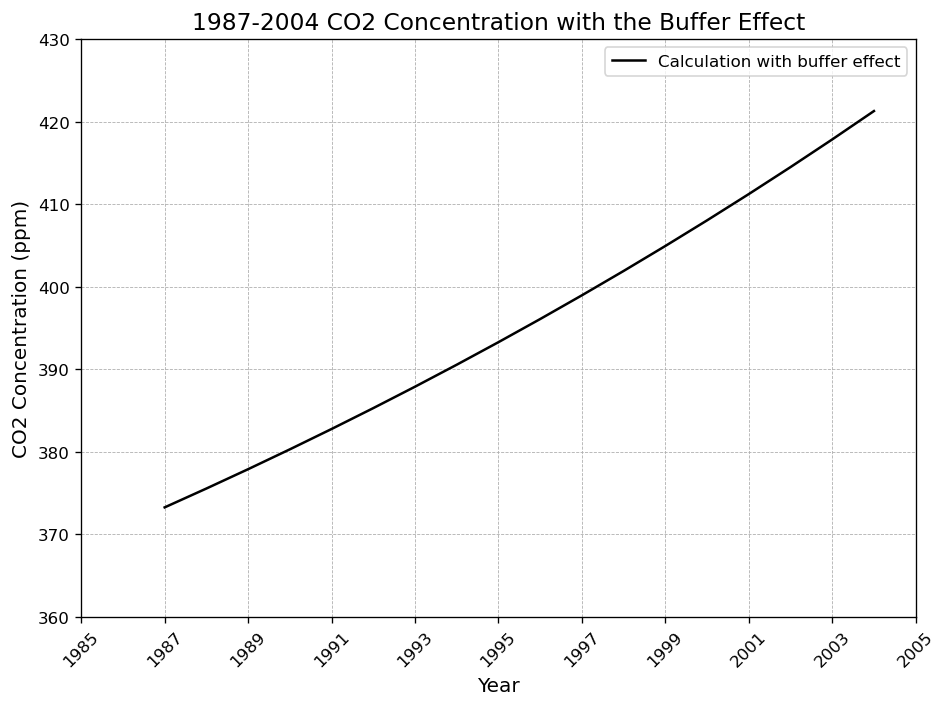

In [ ]:
#1.2
# 定义微分方程函数
def pend_2(y, t2, k12, k21):
    N1, N2, r2 = y
    # 计算大气中CO2浓度（单位：ppm）
    z = N1 / 1000 / 740 * 347
    # 前工业时代海洋表层碳的平衡值（842 PgC/yr）
    N2_0 = 842 * 1000
    # 计算缓冲因子
    xi = 3.69 + 1.86e-2 * z - 1.8e-6 * z**2
    # 计算微分方程的右侧
    dydt = [
        -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + r2,
        k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)),
        2.43954472e-02 * (r2 + 1.12313831e+02)
    ]
    return dydt

# 从前工业时代开始计算（1750年）
x2 = np.arange(1750, 2005)
# 计算排放率
r2 = r_func(x2, 4.82316522e-18, 2.43954472e-02, -1.12313831e+02)

# 初始条件
k12 = 105 / 740
k21 = 102 / 900
N1 = 615 * 1000  # 初始大气碳浓度（百万公吨）
N2 = 842 * 1000  # 初始海洋表层碳浓度（百万公吨）
y0 = [N1, N2, r2[0]]

# 使用 odeint 求解微分方程
sol_with_buffer = odeint(pend_2, y0, x2, args=(k12, k21)) / 740 / 1000 * 347  # 转化为 ppm

# 绘制1987-2004年的CO2浓度积分曲线
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(x2[237:255], sol_with_buffer[237:255, 0], 'k', label='Calculation with buffer effect')
plt.yticks(ticks=np.arange(360, 440, 10), fontsize=10)
plt.xticks(ticks=np.arange(1985, 2006, 2), fontsize=10, rotation=45)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.title('1987-2004 CO2 Concentration with the Buffer Effect', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图形
plt.show()


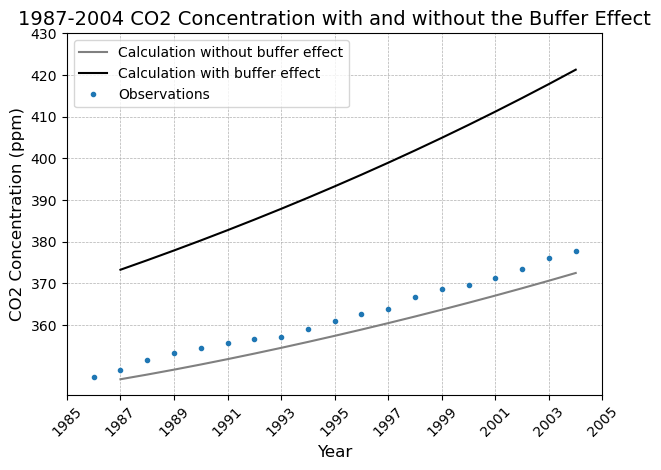

In [76]:
#1.3
# 绘制无缓冲效应的计算结果
plt.plot(x1, sol_no_buffer[:, 0], color='gray', label='Calculation without buffer effect')

# 绘制有缓冲效应的计算结果
plt.plot(x2[237:255], sol_with_buffer[237:255, 0], 'k', label='Calculation with buffer effect')

# 根据链接 Mauna Loa CO2 annual mean data 中的数据绘制实际观测图，选取1986-2004年的数据
CO2_ppm = pd.read_csv("co2_annmean_mlo.csv")
CO2_ppm_1986_2004 = CO2_ppm.iloc[27:46, :]
plt.plot(CO2_ppm_1986_2004['year'], CO2_ppm_1986_2004['mean'], ".", label='Observations')

# 设置横纵坐标轴刻度，设置 legend 位置，设置横纵坐标轴标签，设置标题
plt.yticks(ticks=np.arange(360, 440, 10), fontsize=10)
plt.xticks(ticks=np.arange(1985, 2006, 2), fontsize=10, rotation=45)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
plt.title('1987-2004 CO2 Concentration with and without the Buffer Effect', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图形
plt.show()


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

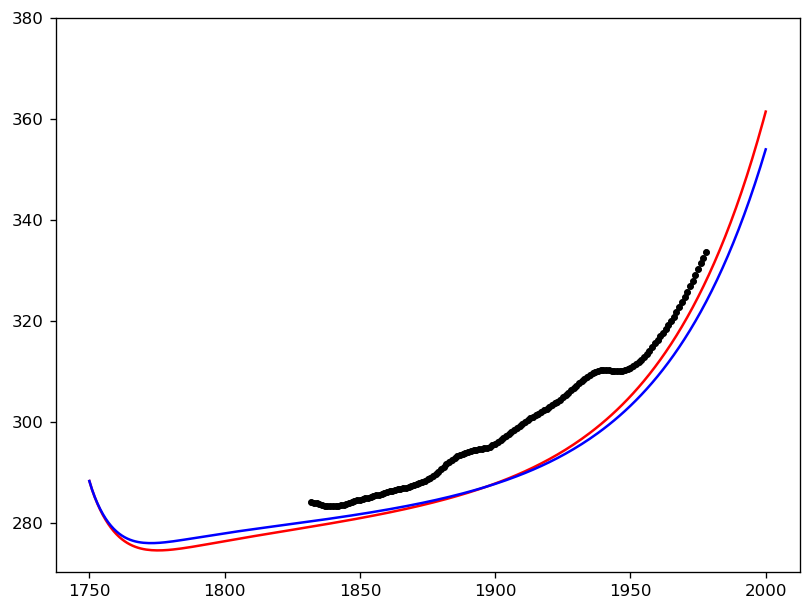

In [100]:
#bonus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import math

# 定义排放速率函数
def r_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 定义 δ 函数，用于拟合陆地利用变化对大气排放率的影响
def δ_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 拟合 δ 参数
# δ_1850_2000 = pd.read_csv("δ_1850_2000.csv")  # 假设数据文件已存在
# popt, pcov = curve_fit(δ_func, δ_1850_2000['year'], δ_1850_2000['Annual Net Flux/Tg'], p0=[0.5, 0, 1], maxfev=2000)

# 输出拟合结果
# # y_fit = [δ_func(i, popt[0], popt[1], popt[2]) for i in δ_1850_2000['year']]
# plt.figure(figsize=(6, 4), dpi=120)
# plt.plot(δ_1850_2000['year'], δ_1850_2000['Annual Net Flux/Tg'], label='Original')
# plt.plot(δ_1850_2000['year'], y_fit, 'r--', label='Fitting')
# plt.legend(loc=2)
# plt.xlabel('Year')
# plt.ylabel('δ / Tg C')
# plt.title('Fitting of Land Use Change Emission Rate')
# plt.show()

# # 输出拟合参数
# print(popt)

# 定义 β=0.38 的微分方程函数
def pend_3(y, x3):
    N1, N2, N3, N4, N5, N6, N7, r3, δ = y
    z = N1 / 1000 / 740 * 347  # z 是大气中CO2浓度（单位：ppm）
    N2_0 = 842 * 1000  # 前工业时代海洋表层碳的平衡值（842 PgC/yr）
    p, p0, f0 = N1, 615 * 1000, 62 * 1000  # P 是大气中CO2浓度，P0 是工业化前值
    xi = 3.69 + 1.86e-2 * z - 1.8e-6 * z**2  # 缓冲因子
    f = f0 * (1 + 0.38 * math.log(p / p0, math.e))  # 净初级生产力
    dydt = [
        -60 / 615 * N1 + 60 / 842 * (N2_0 + xi * (N2 - N2_0)) + r3 - f + δ + 0.2 / 90000000 * N5 + 62 / 1328 * N7,
        60 / 615 * N1 - 60 / 842 * (N2_0 + xi * (N2 - N2_0)) - 9 / 842 * N2 + 52 / 9744 * N3 - 43 / 842 * N2,
        9 / 842 * N2 - 52 / 9744 * N3 - 162 / 9744 * N3 + 205 / 26280 * N4,
        162 / 9744 * N3 - 205 / 26280 * N4 + 43 / 842 * N2 - 0.2 / 26280 * N4,
        0.2 / 26280 * N4 - 0.2 / 9000000 * N5,
        f - 62 / 731 * N6 - 2 * δ,
        62 / 731 * N6 - 62 / 1328 * N7 + δ,
        2.43954472e-02 * (r3 + 1.12313831e+02),
        5.23780754e-03 * (r3 + 4.58363315e+02)
    ]
    return dydt

# 定义 β=0.50 的微分方程函数
def pend_3_(y, x3):
    N1, N2, N3, N4, N5, N6, N7, r3, δ = y
    z = N1 / 1000 / 740 * 347  # z 是大气中CO2浓度（单位：ppm）
    N2_0 = 842 * 1000  # 前工业时代海洋表层碳的平衡值（842 PgC/yr）
    p, p0, f0 = N1, 615 * 1000, 62 * 1000  # P 是大气中CO2浓度，P0 是工业化前值
    xi = 3.69 + 1.86e-2 * z - 1.8e-6 * z**2  # 缓冲因子
    f = f0 * (1 + 0.50 * math.log(p / p0, math.e))  # 净初级生产力
    dydt = [
        -60 / 615 * N1 + 60 / 842 * (N2_0 + xi * (N2 - N2_0)) + r3 - f + δ + 0.2 / 90000000 * N5 + 62 / 1328 * N7,
        60 / 615 * N1 - 60 / 842 * (N2_0 + xi * (N2 - N2_0)) - 9 / 842 * N2 + 52 / 9744 * N3 - 43 / 842 * N2,
        9 / 842 * N2 - 52 / 9744 * N3 - 162 / 9744 * N3 + 205 / 26280 * N4,
        162 / 9744 * N3 - 205 / 26280 * N4 + 43 / 842 * N2 - 0.2 / 26280 * N4,
        0.2 / 26280 * N4 - 0.2 / 9000000 * N5,
        f - 62 / 731 * N6 - 2 * δ,
        62 / 731 * N6 - 62 / 1328 * N7 + δ,
        2.43954472e-02 * (r3 + 1.12313831e+02),
        5.23780754e-03 * (r3 + 4.58363315e+02)
    ]
    return dydt

# 时间范围：从1750年到2000年
x3 = np.arange(1750, 2001)
r3 = r_func(x3, 4.82316522e-18, 2.43954472e-02, -1.12313831e+02)
δ = δ_func(x3, 5.85469324e-02, 5.23780754e-03, -4.58368712e+02)

# 1750年初始值
N1, N2, N3, N4, N5, N6, N7 = 615 * 1000, 842 * 1000, 9744 * 1000, 26280 * 1000, 90000000 * 1000, 731 * 1000, 1238 * 1000
y0 = [N1, N2, N3, N4, N5, N6, N7, r3[0], δ[0]]

# 使用 odeint 求解微分方程
sol3 = odeint(pend_3, y0, x3) / 1000 / 740 * 347  # 转化为 ppm
sol3_ = odeint(pend_3_, y0, x3) / 1000 / 740 * 347  # 转化为 ppm

# 绘制1987-2004年的CO2浓度积分曲线
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(x3, sol3[:, 0], 'r', label='β=0.38')
plt.plot(x3, sol3_[:, 0], 'b', label='β=0.50')

ice_CO2=pd.read_csv("example.csv")
plt.plot(ice_CO2['year'],ice_CO2['CO2(ppm)'],"k.",label='observations')

plt.plot(ice_CO2['year'], ice_CO2['CO2(ppm)'], "k.", label='Observations')

# 设置横纵坐标轴刻度，设置 legend 位置，设置横纵坐标轴标签，设置标题
plt.yticks(ticks=np.arange(280, 400, 20), fontsize=10)
plt.xticks
